In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [59]:

# Raw
path2 = '/mnt/c/users/user/Desktop/Research/lc_data/'
var_df2 = pd.read_csv(path2+'TIC_TIC 304172886(RRC).csv')
# Full Noise
path3 = '/mnt/c/users/user/Desktop/full_noise_var_normed_trimmed/'
var_df3 = pd.read_csv(path3+'trimmed_normed_filtered_TIC 304172886(RRC).csv', header=None)
# Savgol Filter Only
path4 = '/mnt/c/users/user/Desktop/savgol_filter_lc_data/'
var_df4 = pd.read_csv(path4+'filtered_TIC 304172886(RRC).csv')

#C:\Users\User\Desktop\moderate_noise_var_normed_trimmed\trimmed_normed_filtered_TIC 304172886(RRC).csv

In [47]:
def div_by_2(integer):
    'returns divisor=[floor, ceiling] '
    from math import floor, ceil
    divisors = np.zeros(2)
    if (integer%2)==0:
        divisors[0] = int(integer//2)
        divisors[1] = int(integer//2)
    else:
        divisors[0] = int(floor(integer/2))
        divisors[1] = int(ceil(integer/2))
    divisors = [int(item) for item in divisors]
    return (divisors)

In [46]:
def trimmed_data(dataframe, length):
    n_left = div_by_2(abs(len(dataframe)-length))[0]
    n_right = div_by_2(abs(len(dataframe)-length))[1]
    
    if len(dataframe)>length:
        df = dataframe.loc[n_left:len(dataframe)-n_right]
    else: 
        elem_left = pd.DataFrame(np.ones(div_by_2(abs(len(dataframe)-length))[0])*dataframe.iloc[0])
        elem_right = pd.DataFrame(np.ones(div_by_2(abs(len(dataframe)-length))[1])*dataframe.iloc[-1])
        df = pd.concat([dataframe, elem_right])
        df = pd.concat([elem_left, df])
    return(df)

In [48]:
var_df4_tr = trimmed_data(var_df4,1000)

In [51]:
var_df2_tr = trimmed_data(var_df2, 1000)

In [53]:
def noise_generation(data, noise_level):
    """ This function creates a noisy curve from input file
    
    Inputs:
    data: Path to data file 
    noise_level: Ranges [0,1]. Acts as scalar multiple to be applied to SNR curve provided by M.T. Penny
    
    Returns:
    noisy_data: Data after noise application
    
    """
    snr_file = pd.read_csv('/mnt/c/Users/user/Desktop/Research/snr_curve.txt', sep=' ',header=None,names=['Mag', 'Mag Error'])
    snr_mag = snr_file['Mag']
    snr_mag_err = snr_file['Mag Error']

    y_post_noise = []
    for mag in data:
        for i in range(len(snr_mag)):
            if mag>snr_mag[i] and mag<=snr_mag[i+1]:
                y_true = mag + noise_level * np.random.normal(-snr_mag_err[i], snr_mag_err[i])
           # else:
            #    y_true = mag
        y_post_noise.append(y_true)
    return(y_post_noise)

In [66]:
var_df4_tr_noise = noise_generation(var_df4_tr['filter_mag'], 1)

In [64]:
def normalization(arr):
    # Normalizes data via x_norm = (x-min)/(max-min)
    normed_arr = np.zeros(len(arr))
    for i in range(len(arr)):
        normed_arr[i] = (arr[i]-min(arr))/(max(arr)-min(arr))
    return(normed_arr)

In [67]:
var_df4_tr_noise_norm = normalization(var_df4_tr_noise)

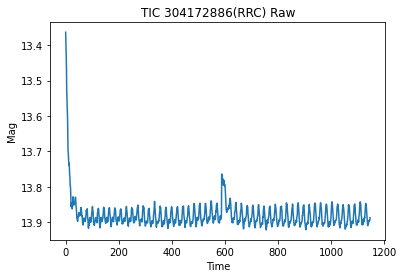

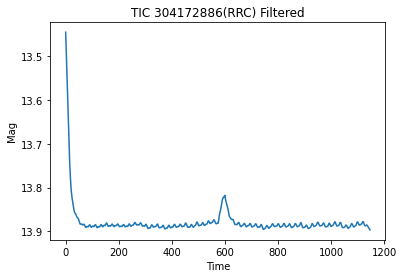

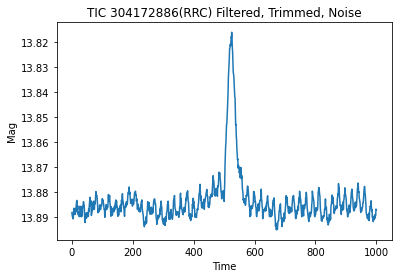

In [179]:
# Raw
plt.plot(var_df2['mag'])
plt.gca().invert_yaxis()
plt.title('TIC 304172886(RRC) Raw')
plt.xlabel('Time')
plt.ylabel('Mag')
plt.show()

# Filtered
plt.plot(var_df4['filter_mag'])
plt.gca().invert_yaxis()
plt.title('TIC 304172886(RRC) Filtered')
plt.xlabel('Time')
plt.ylabel('Mag')
plt.show()

# Filter Trimmed Noise
plt.plot(var_df4_tr_noise)
plt.gca().invert_yaxis()
plt.title('TIC 304172886(RRC) Filtered, Trimmed, Noise')
plt.xlabel('Time')
plt.ylabel('Mag')
plt.show()


# Histogram (FP, FN, ACC)

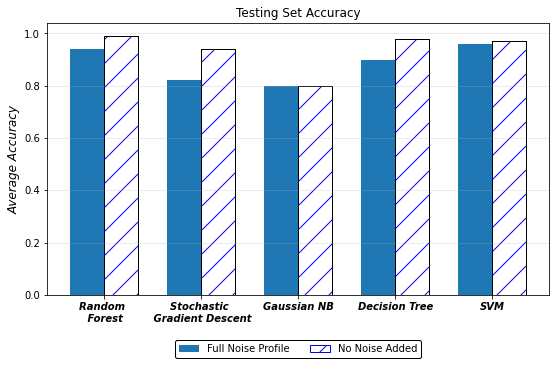

In [8]:
# [FP, FN, Acc]

# Full noise data
rf_noise = [19.79, 9.93, 0.94]
sgd_noise = [58.14, 39.94, 0.82]
gnb_noise = [26.0, 81.0, 0.8]
dt_noise = [28.8, 25.26, 0.9]
svm_noise = [19.0, 3.0, 0.96]

# No noise data
rf = [6.0, 1.6, 0.99]
sgd = [64.8, 20.2, 0.84]
gnb = [27.0, 79.0, 0.8]
dt = [7.2, 3.4, 0.98]
svm = [13.0, 2.0, 0.97]

bin_labels = ['Random \n Forest',
             'Stochastic \n Gradient Descent',
             'Gaussian NB',
             'Decision Tree',
             'SVM']

fp_noise = [19.79, 58.14, 26.0, 28.8, 19.0]
fp_nonoise = [6.0, 64.8, 27.0, 7.2, 13.0]
fn_noise = [9.93, 39.94, 81.0, 25.26, 3.0]
fn_nonoise = [1.6, 20.2, 79.0, 3.4, 2.0]
#acc_noise = [1.0, 0.91, 0.8, 1.0, 0.96] #<-- Train set
acc_noise = [0.94, 0.82, 0.8, 0.9, 0.96] #<-- Test Set
#acc_nonoise = [1.0, 0.89, 0.85, 1.0, 0.98] #<-- Train set
acc_nonoise = [0.99, 0.94, 0.8, 0.98, 0.97] #<-- Test Set

    
    
x = np.arange(len(bin_labels))
width = 0.35

plt.figure(figsize=(9,5))
plt.bar(x=x-width/2, height=acc_noise, align='center', width=width, label='Full Noise Profile')
plt.bar(x=x+width/2, height=acc_nonoise, align='center', width=width, label='No Noise Added',
        hatch='/', lw=1, color='none', edgecolor='blue')
plt.bar(x=x+width/2, height=acc_nonoise, align='center', width=width,
         lw=1, color='none', edgecolor='k')
plt.xticks(ticks=np.arange(0,5), labels=bin_labels, fontsize='medium', weight='bold', fontstyle='oblique')
legend = plt.legend(loc='lower center', framealpha=1, edgecolor='k', markerscale=100, bbox_to_anchor=(0.5, -0.25), ncol=2)
plt.ylabel('Average Accuracy', fontstyle='oblique', fontsize='large')
plt.grid(axis='y', alpha=0.3)
plt.title('Testing Set Accuracy')
plt.savefig(fname='/mnt/c/users/user/Desktop/ThesisFigures/Acc_bar.png', bbox_inches='tight')
#plt.show()

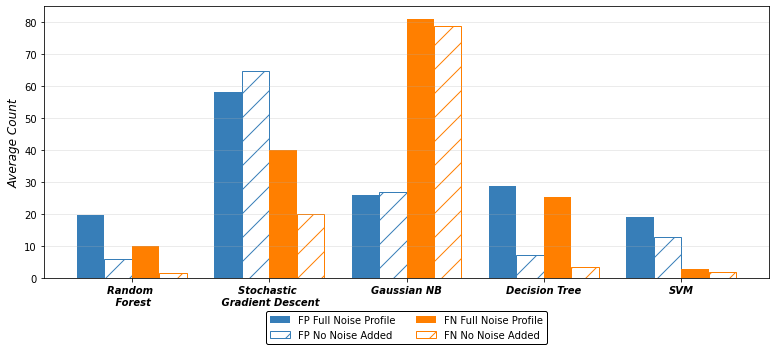

In [178]:
width = 0.2
plt.figure(figsize=(13,5))
plt.bar(x=x-3/2*width, height=fp_noise, align='center', width=width, label='FP Full Noise Profile', color='#377eb8')
plt.bar(x=x-width/2, height=fp_nonoise, align='center', width=width, label='FP No Noise Added',
        hatch='/', lw=1, color='none', edgecolor='#377eb8')
plt.bar(x=x+width/2, height=fn_noise, align='center', width=width, label='FN Full Noise Profile', color='#ff7f00')
plt.bar(x=x+3/2*width, height=fn_nonoise, align='center', width=width, label='FN No Noise Added',
        hatch='/', lw=1, color='none', edgecolor='#ff7f00')
#plt.bar(x=x+width/2, height=acc_nonoise, align='center', width=width,
  #       lw=1, color='none', edgecolor='k')
plt.xticks(ticks=np.arange(0,5), labels=bin_labels, fontsize='medium', weight='bold', fontstyle='oblique')
legend = plt.legend(loc='lower center', framealpha=1, edgecolor='k', markerscale=100, bbox_to_anchor=(0.5, -0.26), ncol=2)
plt.ylabel('Average Count', fontstyle='oblique', fontsize='large')
plt.grid(axis='y', alpha=0.3)
plt.savefig(fname='/mnt/c/users/user/Desktop/ThesisFigures/fpfn_bar.png', bbox_inches='tight')
plt.show()